In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 7.1: The bias of a sample

Figure 7.3 (page 112) shows you an imaginary bacteria population. Each bacteria is
numbered (0 to 99). Note, some of the bacteria have flagella (hairs). Perform the following
samplings.
(a) Pick a sample of 10 bacteria using your best judgment.
(b) Pick a sample of 10 bacteria by throwing a pencil in the air and seeing where it
lands (which bacteria it picks).
(c) Pick a sample of 10 bacteria using random numbers generated by the Python code
below. Write down the numbers the first time you run the code (you will get new
numbers if you run i again).
ten_samples.py
1 import pandas as pd
2 df = pd. DataFrame ( range (100))
3 df. sample (10)
1. Measure the length of each bacteria in (a), (b) and (c) and then calculate the mean
length.
2. Count how many bacteria have flagella in (a), (b) and (c).
3. Compare your results for 1. and 2. Are there any differences in the samples? What
could these differences be due to? Think of potential bias.
4. Which of the methods is likely the least bias?

## 7.2.3 Simulating random sampling with Python

In [2]:
df = pd.DataFrame({
    'sex': ['female'] * 2923000 + ['male'] * 2899700
})

In [3]:
sample = df.sample(25)

In [4]:
sample

,sex
2045704,female
1832251,female
4401086,male
608017,female
488805,female
1136407,female
2813198,female
979684,female
828977,female
3462694,male


In [6]:
sample.value_counts()

sex   
female    13
male      12
dtype: int64

In [5]:
df.value_counts()

sex   
female    2923000
male      2899700
dtype: int64

In [7]:
# The percentage of females in the population is.
df['sex'].value_counts()/len(df)*100

female    50.200079
male      49.799921
Name: sex, dtype: float64

In [9]:
"""
Use a random sample to make an estimate
From a random sample we can give an estimate of the percentage of females in Denmark.
"""

female_count = sample['sex'].value_counts()['female']
print(f'The sample of {len(sample)} Danes has {female_count} females.')
procent_female = female_count / len(sample)*100
print(f'It it estimated that {procent_female:.2f}% of the population are,!females.')

The sample of 25 Danes has 13 females.
It it estimated that 52.00% of the population are,!females.


In [11]:
# Repeat sampling with a for-loop
print('First verse of Around the World by Daft Punk:')
for i in range(8):
    print('Around the world, around the world')

First verse of Around the World by Daft Punk:
Around the world, around the world
Around the world, around the world
Around the world, around the world
Around the world, around the world
Around the world, around the world
Around the world, around the world
Around the world, around the world
Around the world, around the world


In [13]:
for i in range(4):
    sample = df.sample(25)
    female_count = sample['sex'].value_counts()['female']
    procent_female = female_count / len(sample)*100
    print(f'Estimate {i}: {procent_female:.2f}% of the population are females.')

Estimate 0: 64.00% of the population are females.
Estimate 1: 60.00% of the population are females.
Estimate 2: 48.00% of the population are females.
Estimate 3: 56.00% of the population are females.


In [14]:
"""
Let us now
repeat the procedure 100 times, and save the estimates to a list and a DataFrame named
samples.
"""
list_of_estimates = []
for i in range(100):
    sample = df.sample(25)
    female_count = sample['sex'].value_counts()['female']
    procent_female = female_count / len(sample)*100
    list_of_estimates.append(procent_female)
samples = pd.DataFrame({
'Estimate of percent females': list_of_estimates
})
samples.head(4)

,Estimate of percent females
0,52.0
1,56.0
2,56.0
3,32.0


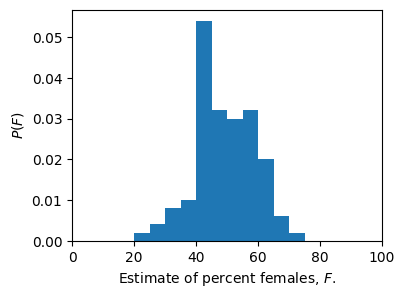

In [16]:
# Below we make a histogram of estimates.

samples.plot.hist(
y = 'Estimate of percent females',
figsize=(4, 3),
bins=np.arange(0, 100, 5), # Set bins using a NumPy array
density=True,
legend=False
)
plt.xlim(0,100)
plt.xlabel('Estimate of percent females, $F$.')
plt.ylabel('$P(F)$');

In [17]:
"""
The variations can be quantified by computing the standard deviation of the estimates. This
gives us an idea of how precise an estimate is when using a random sample of only 25 Humans.
"""
s = samples['Estimate of percent females'].std()
print(f'Standard deviation of estimates: {s}')

Standard deviation of estimates: 9.597979585371712


## Exercise 7.2: Popcorn sample

This exercise investigates the lengths of the popcorn that you measured in a previous
exercise. (If you measured two or more sizes, pick one to represent the “popcorn length”).
We will think of the popcorn in your bag as the population. In the following, we simulate
a situation where we perform a random sample of this population. Hint: Use Jupyter to
write code similar to that presented in ?? (page ??).
1. Compute the mean popcorn length using all your collected data (the population
mean)
2. Investigate random samples of size n = 10.
(a) Make one sample and compute the sample mean. Discuss why the sample
mean (probably) deviates from the population mean.
(b) Repeat the above random sampling ten (10) times and append the means in
a list. You can copy-paste code or use a for-loop.
(c) Plot the mean value for each sample versus sample number.
(d) Use your results to give an rough estimate of how accurate you the average
size of a popcorn can be estimated using n = 10 (later in the course we will
discuss such an error estimate in more details).
3. (Optional) Repeat the above question using one hundred (100) random samples
(use a for-loop).
(a) Plot the distribution (e.g., histogram) the sample means.
(b) Use the shape of the distribution to discuss how accurate can the popcorn
length can be estimated using n = 10.
4. (Optional) Make 100 random samples of size n of your popcorn data, where n is
either 1, 10 or 25.
(a) Calculate the sample means for n =1, 10 and 25, and save the results to three
lists.
(b) Plot the distribution (e.g., histogram) of three resulting distributions of means.
(c) How does the distribution of your means (estimates) change as a function of
n?

## Exercise 7.3: Discuss possible bias of your popcorn data
In this exercises we will discuss possible sources of bias in your popcorn sample. Think
of you bag as a sample from a factory.
1. What could be possible sources of bias when you did your measurements? Here is
a list of sub-questions address this:
• Did you sample all the kernels in the bag, or only the top of the bag?
• Could that affect the size distribution of your measurements?
• Did you include burned popcorn?
• Did you eat the ones that looked tasty before measuring?
• Did the bag contain crumbs (DK: krummer), and when was a popcorn so small
that you considered it crumb?
• At what time of year did you perform the measurements, compared to the
production time of the bag and the harvest season of corn?
• ... (Come up more relevant questions).

## Exercise 7.4: How accurate is a vox-pop survey

(Optional. This exercise investigates statistical uncertainties of surveys.) In the main
text we simulated random sampling to estimate the percentage of females in Denmark.
1. Plot the histogram for the estimate of the percentage of females in Denmark when
the sample size is n = 100, n = 1000, n = 10000 and n = 100000, respectively.
2. The percentage of females in Denmark is larger than 50%. Use the result from the
above question to estimate how large a sample should be to confidently estimate the
true percentage within an accuracy of 0.1%. (Here confidently is loosely defined).
3. Before a general election in Denmark a sample of typical 2000 people are asked
what they are likely to vote. This is used to give predictions for the outcome of
the election. Imagine that a small political party is the preference of 2% of the
votes. Simulate 1000 hypothetical surveys of size 2000. Show the distribution of
the estimates of how many votes the small party gets. What does the distribution
tell about the accuracy of a typical survey before an election?
4. Discuss possible sources for bias in a election survey.